# Part 1: Prediction Task
To have an idea of the data, I made a few quick checks first<br>


In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df=pd.read_csv('au_train.csv',skipinitialspace=True)
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
11165,36,Private,272950,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,50,United-States,<=50K
22077,47,Private,418961,Assoc-voc,11,Divorced,Sales,Unmarried,Black,Female,0,0,25,United-States,<=50K
17983,33,Private,181091,10th,6,Divorced,Craft-repair,Not-in-family,White,Male,0,0,35,England,<=50K
2215,33,Private,127215,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
30289,24,Private,154422,Bachelors,13,Never-married,Exec-managerial,Own-child,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K


In [2]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [3]:
df['class'].value_counts() #Checking the Distrubition of Income

<=50K    24720
>50K      7841
Name: class, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Feature Selection
To obtain a better understanding of the features, I first plotted:<br>
A) the distribution of each attibute and<br>
B) the split of the incomes for each attibute.<br>

### <em>PLEASE REFER TO THE FILE __"Problem_2.ipnyb"__ FOR THE SEGMENTATION STUDY CONDUCTED FIRST<em>

Upon a close inspection of the given data and the plots, it can be observed that:<br>
i) __'workclass'__, __'fnlwgt'__, __'capital-gain'__, __'capital-loss'__, and __'native-country'__  have minimal influence on income. Thus, I decided not to use these attibutes.<br>
ii) __'race'__ is oversampled with White and Black classes and is not indicative of much useful information<br>
iii) __'education'__ is just the categorical version of 'education-num'; so keeping either one should suffice<br>
iv) __'relationship'__ is redundant with __'marital-status'__ ; apparently __'marital-status'__ is a more inclusive attribute<br>
 

To make the final selection of features, I made the following decisions:<br>
i) I chose __'age'__, __'sex'__, __'education-num__, __'marital-status'__ and __'occupation'__ as the key features since they have significant influences on the income<br>
iii) Even though __'sex'__ is dominated by 'Male' classes, it still show a significance in determining income<br>

In [5]:
dfNew=df[['age','sex','education-num','marital-status','occupation','hours-per-week','class']]
dfNew.head()

,age,sex,education-num,marital-status,occupation,hours-per-week,class
0,39,Male,13,Never-married,Adm-clerical,40,<=50K
1,50,Male,13,Married-civ-spouse,Exec-managerial,13,<=50K
2,38,Male,9,Divorced,Handlers-cleaners,40,<=50K
3,53,Male,7,Married-civ-spouse,Handlers-cleaners,40,<=50K
4,28,Female,13,Married-civ-spouse,Prof-specialty,40,<=50K


## Data Preprocessing

### Steps Taken
1) Removing samples with missing values (e.g., cases where 'occupation' is '?')
2) Encoding categorical variables 'sex', 'marital-status', and 'occupation' using __OneHotEncoder__
3) Scaling numerical variables 'education-num' and 'hours-per-week' using __MinMaxScaler__
4) Encoding target variable (i.e., 'class') using __LabelEncoder__

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#removing samples whose 'occupation' is '?'
mask1=dfNew['occupation']!='?' 
dfNew=dfNew[mask1]


#Scaling Numerical Variables (MinMaxScaler) and encoding categorical variables (OneHotEncoder)
numericals = ['education-num', 'hours-per-week']#Selecting Numerical Columns
categoricals = ['sex', 'marital-status',  'occupation']#Selecting Categorical Columns

#Preparing Column Transformer to perform the transformation operations
tranParam = [('catData', OneHotEncoder(), categoricals), #Column Transform Parameters
             ('numData', MinMaxScaler(), numericals)]
colTrans = ColumnTransformer(transformers=tranParam) #Column Transformer

#Defining input variables
X = dfNew.drop('class',axis=1)
#Transforming input variables using column transformer
X = colTrans.fit_transform(X)

#Defining target variables
#Encoding target variable ('class') using LabelEncoder
targetEncoder = LabelEncoder()
Y=targetEncoder.fit_transform(dfNew['class'])

# Training ML Classifiers

## Used the following classifiers:
### 'LinearSVC','NaiveBayes','RandomForest','MLPClassifier','AdaBoost','GradientBoosting','DecisionTreeClassifier'

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import StandardScaler #Scaler to standardize data

#Importing Different Classifiers
from sklearn.naive_bayes import MultinomialNB #Naive Bayes
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostRegressor, AdaBoostClassifier
from sklearn.svm import LinearSVC #LinearSVC
from sklearn.calibration import CalibratedClassifierCV #Needed for linearSVC
from sklearn.neural_network import MLPClassifier #MLP
from sklearn.tree import DecisionTreeClassifier# DecisionTree

In [8]:
#Splitting data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(X, Y , random_state=1)

#Training the classifiers with training datasets

clf={}
clf[0] = CalibratedClassifierCV(LinearSVC()).fit(train_data, train_labels)
clf[1] = MultinomialNB().fit(train_data, train_labels)
clf[2] = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0).fit(train_data, train_labels)
clf[3] = MLPClassifier(random_state=1, max_iter=300).fit(train_data, train_labels)
clf[4] = AdaBoostClassifier(n_estimators=100, random_state=0).fit(train_data, train_labels)
clf[5] = GradientBoostingClassifier(random_state=0).fit(train_data, train_labels)
#clf[6] = LogisticRegression(random_state=0).fit(train_data, train_labels)
clf[6] = DecisionTreeClassifier(random_state=0).fit(train_data, train_labels)
classifiers=['LinearSVC','NaiveBayes','RandomForest','MLPClassifier','AdaBoost','GradientBoosting','DecisionTreeClassifier']

## Computing Validation Accuracy and Error

In [9]:
#Evaluating the models with validation dataset
#Printing the accuracy and error for each models
for item in range(len(classifiers)):
    acc=clf[item].score(test_data, test_labels)
    acc=round(acc,3)
    err=round(1-acc,3)
    print(classifiers[item],"- Accuracy: ",acc," Error: ",err)     

LinearSVC - Accuracy:  0.826  Error:  0.174
NaiveBayes - Accuracy:  0.803  Error:  0.197
RandomForest - Accuracy:  0.806  Error:  0.194
MLPClassifier - Accuracy:  0.825  Error:  0.175
AdaBoost - Accuracy:  0.824  Error:  0.176
GradientBoosting - Accuracy:  0.828  Error:  0.172
DecisionTreeClassifier - Accuracy:  0.808  Error:  0.192


### Based on the scores, it is apparent that __GradientBoosting__ has the highest validation accuracy of __82.8%__

# Testing the model

## Importing Test Dataset

In [10]:
import pandas as pd
#dfTest=pd.read_csv('au_test.csv',skipinitialspace=True)

dfTest=pd.read_csv('au_test.csv',skipinitialspace=True,na_values='?')
dfTest=dfTest.dropna()

dfTest.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [11]:
dfTest['class'].value_counts()

<=50K.    11360
>50K.      3700
Name: class, dtype: int64

## Selecting only the required features

In [12]:
dfTest=dfTest[['age','sex','education-num','marital-status','occupation','hours-per-week','class']]
dfTest.head()

,age,sex,education-num,marital-status,occupation,hours-per-week,class
0,25,Male,7,Never-married,Machine-op-inspct,40,<=50K.
1,38,Male,9,Married-civ-spouse,Farming-fishing,50,<=50K.
2,28,Male,12,Married-civ-spouse,Protective-serv,40,>50K.
3,44,Male,10,Married-civ-spouse,Machine-op-inspct,40,>50K.
5,34,Male,6,Never-married,Other-service,30,<=50K.


## Defining the Input Variables and Target Variables

In [13]:
#Defining input variables test_data, test_labels
XTest = dfTest.drop('class',axis=1)
#Transforming input variables using column transformer
XTest = colTrans.fit_transform(XTest)

#Defining target variables
#Encoding target variable ('class') using LabelEncoder
targetEncoder = LabelEncoder()
YTest=targetEncoder.fit_transform(dfTest['class'])

## Computing Accuracy, Precision, Recall, F1, and Error with Test Set

In [14]:
#Testing the models with test dataset
#Printing the accuracy and error for each models

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

for item in range(len(classifiers)):
    YPred=clf[item].predict(XTest)
    acc=round(accuracy_score(YTest, YPred),3)#Accuracy
    pre=round(precision_score(YTest, YPred, average='macro'),3)#Precision
    f1c=round(f1_score(YTest, YPred, average='macro'),3)#F1 Score
    rec=round(recall_score(YTest, YPred, average='macro'),3)#Recall
    err=round(1-acc,3)
    print(classifiers[item],"- Accuracy: ",acc," Precision: ",pre," Recall: ",rec," F1: ",f1c," Error: ",err) 

LinearSVC - Accuracy:  0.828  Precision:  0.776  Recall:  0.733  F1:  0.75  Error:  0.172
NaiveBayes - Accuracy:  0.803  Precision:  0.733  Recall:  0.728  F1:  0.731  Error:  0.197
RandomForest - Accuracy:  0.807  Precision:  0.783  Recall:  0.641  F1:  0.664  Error:  0.193
MLPClassifier - Accuracy:  0.83  Precision:  0.777  Recall:  0.741  F1:  0.756  Error:  0.17
AdaBoost - Accuracy:  0.826  Precision:  0.774  Recall:  0.727  F1:  0.745  Error:  0.174
GradientBoosting - Accuracy:  0.832  Precision:  0.784  Recall:  0.735  F1:  0.753  Error:  0.168
DecisionTreeClassifier - Accuracy:  0.807  Precision:  0.74  Recall:  0.711  F1:  0.723  Error:  0.193


### The accuracy of __GradientBoosting__ carries forward to the test set where we see that it has the highest accuracy of __83.2%__

## Plotting ROC Curves

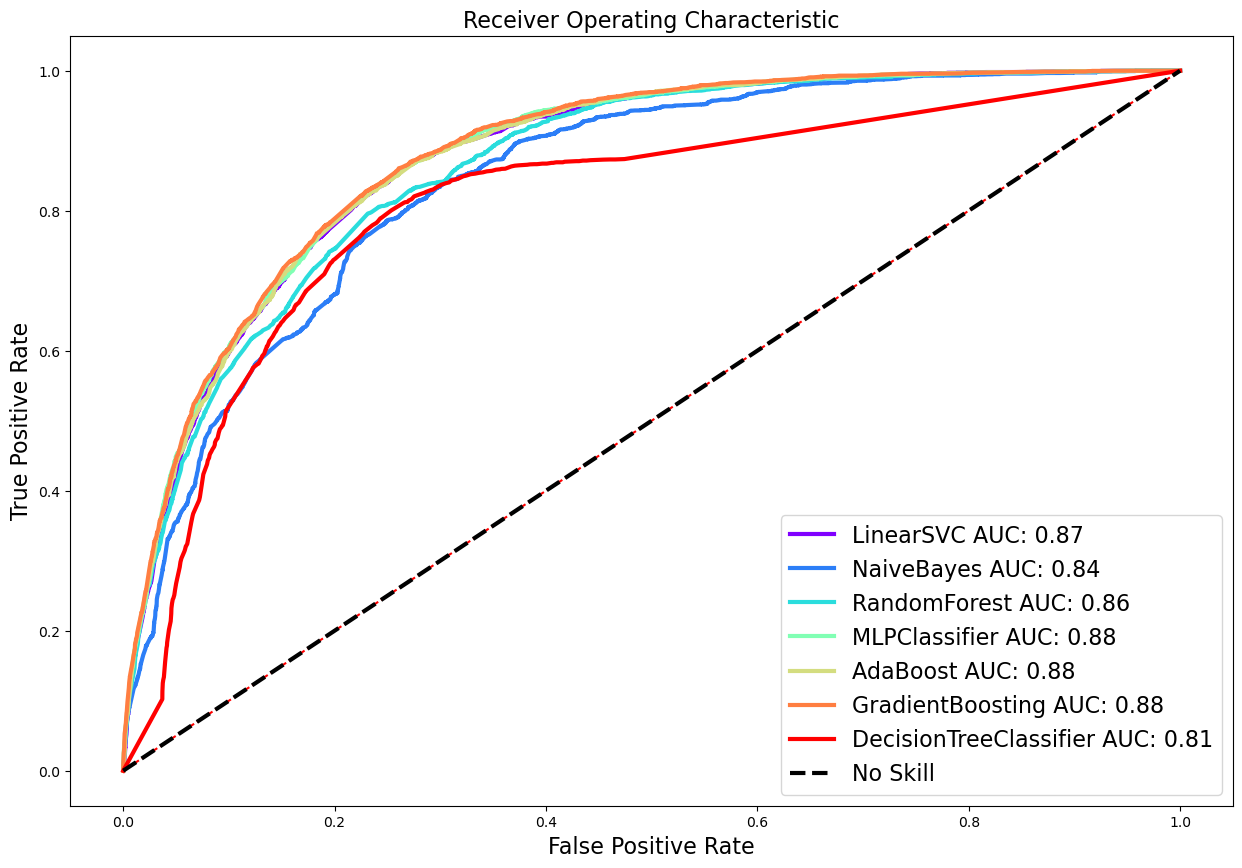

In [15]:
from sklearn.metrics import roc_curve, auc
from matplotlib.cm import rainbow
import matplotlib.pyplot as plt
import numpy as np
colors = rainbow(np.linspace(0, 1, len(classifiers)))

plt.figure(figsize = (15, 10))
plt.plot([0,1], [0,1], 'r--')

for item in range(len(classifiers)):
    probs = clf[item].predict_proba(XTest)
    # Reading probability of second class
    probs = probs[:, 1]
    fpr, tpr, thresholds = roc_curve(YTest, probs)
    roc_auc = auc(fpr, tpr)
    label = classifiers[item] + ' AUC:' + ' {0:.2f}'.format(roc_auc)
    plt.plot(fpr, tpr, c = colors[item], label = label, linewidth = 3)
plt.plot([0,1],[0,1], color='black', linestyle='--',label=('No Skill'),linewidth=3)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)

### The ROC curve shows that the GradientBoosting algorithm has the highest AUC of __0.88__

## Plotting Confusion Matrices

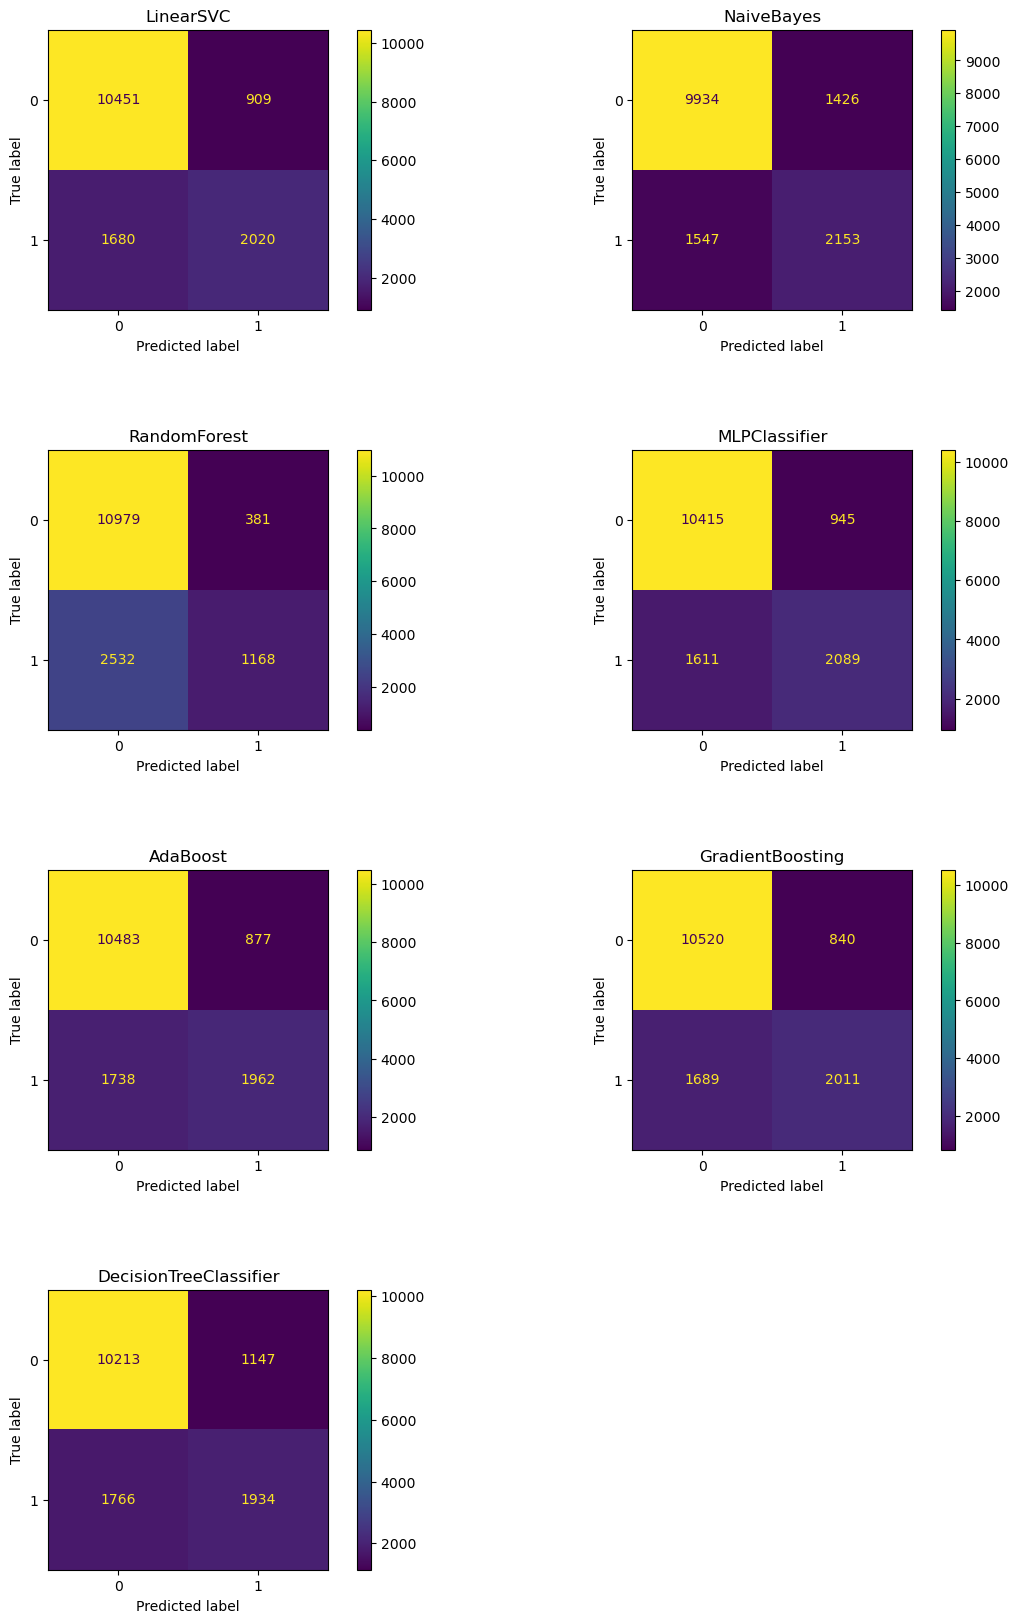

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Preparing Subplots for Each Confusion Matrix
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.subplots_adjust(hspace = .5, wspace=.01)
axs = axs.ravel()
fig.delaxes(axs[-1])#deleting unused subplot at last position

#Constructing Confusion Matrix For Each Classifier
for ax,item in zip(axs.ravel(),clf):
    ax.set_title(classifiers[item])
    predictions = clf[item].predict(XTest)
    cm = confusion_matrix(YTest, predictions, labels=clf[item].classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf[item].classes_)
    disp.plot(values_format='',ax=ax)#suppressing scientific notation

    
plt.show()

### Based on the confusion matrices, it is apparent that: <br>
1) the __RandomForest__ algorithm has the highest __True Positives__ (10979) and 
1) the __NaiveBayes__ algorithm has the highest __True Negatives__ (2153).